In [1]:
import import_ipynb

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as const

from units import UnitDataFrame as UDF

from unit_analysis import df_export, units_export

importing Jupyter notebook from unit_analysis.ipynb
importing Jupyter notebook from mergeData.ipynb
importing Jupyter notebook from hall_data.ipynb
importing Jupyter notebook from rho_c_data.ipynb


In [2]:
imagefolder = '../images/'

sns.set_theme(context='paper',
             style = 'whitegrid')

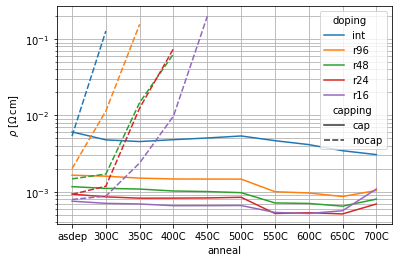

In [3]:
# rho vs anneal/cap/doping

df = (
    df_export
)

rho_unit = u.Ohm*u.cm

p = sns.lineplot(
    x = df.anneal,
    y = df.rho_corr.values.to_value(rho_unit),
    hue = df.doping,
    style = df.capping,
)

p.set(
    yscale = 'log',
    ylabel = f'$\\rho$ [{rho_unit:latex}]',
)

p.grid(
    which = 'both',
)

plt.savefig(imagefolder + 'rho_vs_acd.png')


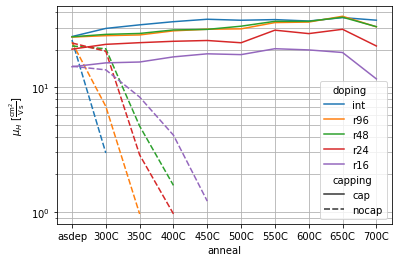

In [4]:
# mu_H vs anneal/cap/doping

df = (
    df_export
)

mu_H_unit = u.cm **2 / (u.V * u.s)

p = sns.lineplot(
    x = df.anneal,
    y = df.mu_H.values.to_value(mu_H_unit),
    hue = df.doping,
    style = df.capping,
)

p.set(
    yscale = 'log',
    ylabel = f'$\\mu_H$ [{mu_H_unit:latex}]',
)

p.grid(
    which = 'both',
)

plt.savefig(imagefolder + 'mu_H_vs_acd.png')

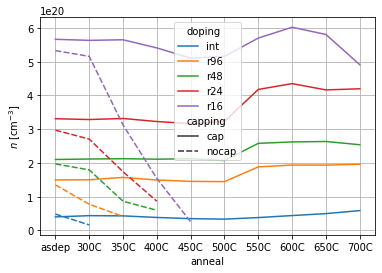

In [6]:
# n vs anneal/cap doping

df = (
    df_export
)

n_unit = u.cm **(-3)

p = sns.lineplot(
    x = df.anneal,
    y = df.n_corr.values.to_value(n_unit),
    hue = df.doping,
    style = df.capping,
)

p.set(
    #yscale = 'log',
    ylabel = '$n$ [cm$^{-3}$]',
)

p.grid(
    which = 'both',
)


plt.savefig(imagefolder + 'n_vs_acd.png')

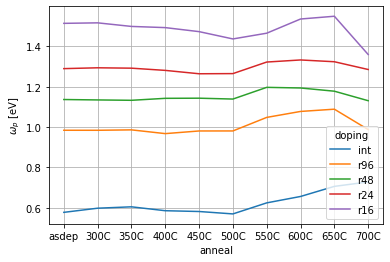

In [7]:
# omega_p

df_units = df_export.get_units()
df_unitless = df_export.to_unitless(show_units = False)

df = (
    UDF(df_unitless[df_unitless.capping == 'cap'], units = df_units)
)

omega_unit = u.eV

p = sns.lineplot(
    x = df.anneal,
    y = df.omega_p.values.to_value(omega_unit),
    hue = df.doping,
    #style = df.capping,
)

p.set(
    #yscale = 'log',
    ylabel = f'$\omega_p$ [{omega_unit:latex}]',
)

p.grid(
    which = 'both',
)

plt.savefig(imagefolder + 'omega_p_vs_ad.png')

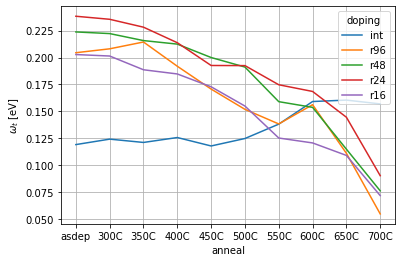

In [27]:
# omega_t

df_units = df_export.get_units()
df_unitless = df_export.to_unitless(show_units = False)

df = (
    UDF(df_unitless[df_unitless.capping == 'cap'], units = df_units)
)

omega_unit = u.eV

p = sns.lineplot(
    x = df.anneal,
    y = df.omega_t.values.to_value(omega_unit),
    hue = df.doping,
    #style = df.capping,
)

p.set(
    #yscale = 'log',
    ylabel = f'$\omega_t$ [{omega_unit:latex}]',
)

p.grid(
    which = 'both',
)

plt.savefig(imagefolder + 'omega_t_vs_ad.png')

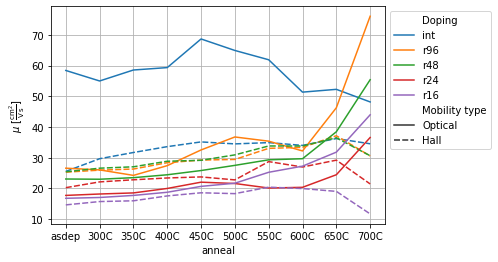

In [153]:
doping_colname = 'Doping'
kind_colname = 'Mobility type'


pdf = (
    pd.DataFrame(
        data = {
            'anneal' : df.anneal,
            'doping' : df.doping,
            'Optical' : df.mu_opt.values.to_value(mu_unit),
            'Hall' : df.mu_H.values.to_value(mu_unit),
        })
    .melt(id_vars = ['doping','anneal'], value_vars = ['Optical','Hall'])
    .rename(columns = {'variable' : kind_colname, 
                       'value' : 'mobility',
                       'doping' : doping_colname,
                      })
)

p = sns.lineplot(
    data = pdf,
    x = 'anneal',
    y = 'mobility',
    style = kind_colname,
    hue = doping_colname,
    legend = True,
    #markers = True,
)

p.set(
    #yscale = 'log',
    ylabel = f'$\mu$ [{mu_unit:latex}]',
)

p.grid(
    which = 'both',
)



p.legend(
    loc = 'upper left',
    bbox_to_anchor = (1,1),
    #borderaxespad = 5,
)

# This will work in 0.11.2 :( afraid of updating...
# sns.move_legend(p, loc = 'upper left')


plt.savefig(
    imagefolder + 'mobilities_anneal.png', 
    dpi = 600, 
    bbox_inches = 'tight',
)

In [108]:
dir(p)

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_

In [135]:
p.artists

<Axes.ArtistList of 0 artists>